In [1]:
# Declaring path variables to make Basemap work in jupyter hub. Make sure that the conda environment path matches yours
import os
os.environ['PATH'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/bin:' + os.environ['PATH']
os.environ['PROJ_LIB'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/share/proj'

In [2]:
# General Tool Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import collections
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import math
from IPython.core.display import display, HTML
from pickle import dump, load
%matplotlib inline

In [3]:
wellnames = ['1H','2H','3H','4H','5H','6H','7H','8H','9H','10H','2B','3B']
#New Data
newfilenames = {'1H':'SILVERTIP 76-7 UNIT A 1H_BHP DATA.csv', '2H':'SILVERTIP 76-7 UNIT A 2H_BHP DATA.csv', '3H':'SILVERTIP 76-7 UNIT A 3H_BHP DATA.csv',\
            '4H':'SILVERTIP 76-7 UNIT A 4H_BHP DATA.csv', '5H':'SILVERTIP 76-7 UNIT A 5H_BHP DATA.csv','6H':'SILVERTIP 76-7 UNIT A 6H_BHP DATA.csv','7H':'SILVERTIP 76-7 UNIT A 7H_BHP DATA.csv',\
            '8H':'SILVERTIP 76-7 UNIT A 8H_BHP DATA.csv','9H':'SILVERTIP 76-7 UNIT A 9H_BHP DATA.csv','10H':'SILVERTIP 76-7 UNIT A 10H_BHP DATA.csv','2B':'SILVERTIP 76-7 UNIT B 2H_BHP DATA.csv',\
            '3B':'SILVERTIP 76-7 UNIT B 3H_BHP DATA.csv'}

In [4]:
welldfs = {}
for well in wellnames:
    filename = newfilenames[well]
    welldfs[well] = pd.read_csv(filename,skiprows=1)
    welldfs[well].rename(columns = {'Unnamed: 0':'Date'},inplace = True)
    welldfs[well]['Date'] = pd.to_datetime(welldfs[well]['Date']).dt.date
    welldfs[well].to_pickle("./SavedData/{}.pkl".format(well))

In [5]:
welldfs['1H'].head()


,Date,BHP,BHP at gauge,Casing Pressure,Choke,Gas Rate,Injection Rate,Measured BHP,Measured BHT,Oil Rate,Tubing Pressure,Water Rate
0,2018-09-25,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-09-26,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-09-27,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-09-28,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-09-29,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#State reservoir conditions and assumptions
ResPres = {'1H': 9000, '2H': 10000,'5H':9873}

In [7]:
ResPres = {
'1H': 9873,
'2H': 9873,
'3H': 9873,
'4H': 9873,
'5H': 9873,
'6H': 10446.67969,
'7H': 7548,
'8H': 9873,
'9H': 9873,
'10H': 10123.43262,
#'1B': 10274.63184,
'2B': 10275.59766,
'3B': 9985.888672}


In [26]:
#welldfs['1H']['Test'] = welldfs['1H']['Cum Oil'] -9000

In [27]:
#welldfs['5H']['Oil Rate'][28] 

In [28]:
#if(pd.isnull(welldfs['1H']['BHP at gauge'][28])):
    print ('yay')

yay


In [29]:
#for i,row in enumerate(welldfs['1H'].itertuples(),1):
#    #print(row,welldfs['1H']['BHP at gauge'][i])

In [30]:
    #Calculate Delta P
    #for i,row in enumerate(welldfs['1H'].itertuples(),1):
    #    if(pd.isnull(welldfs['1H']['BHP at gauge'][i])):
    #        welldfs['1H']['Delta P'][i] = welldfs['1H']['BHP'][i] - ResPres ['1H']
    #    else:
    #        welldfs['1H']['Delta P'][i] = welldfs['1H']['BHP at gauge'][i] - ResPres ['1H'] 
    #Calculate normalized rate (q / delta p)

In [42]:
welldfs['3H']['Delta P'] = welldfs['3H']['BHP'] - ResPres ['3H']
welldfs['3H']['Delta P']
welldfs['3H']['Rate N'] = (welldfs['3H']['Water Rate'] + welldfs[well]['Oil Rate'] ) / welldfs['3H']['Delta P']


In [8]:
for i,well in enumerate(welldfs):
    iwell = wellnames[i]
    #Calculate Cum Oil
    welldfs[well]['Cum Oil'] = welldfs[well]['Oil Rate'].cumsum()
    #Calculate Cum Water
    welldfs[well]['Cum Water'] = welldfs[well]['Water Rate'].cumsum()
    #Calculate Cum Liquid Rate
    welldfs[well]['Cum Liquid'] = welldfs[well]['Cum Water'] + welldfs[well]['Cum Oil']  
    #Calculate Material Balance time, defined as  Oil Rate / Cum Oil
    welldfs[well]['Mat Bal Time'] = welldfs[well]['Cum Oil'] / welldfs[well]['Oil Rate']

    #Calculate Delta P
    #for i,row in enumerate(welldfs['1H'].itertuples(),1):
    #    if(pd.isnull(welldfs['1H']['BHP at gauge'][i])):
    #        welldfs['1H']['Delta P'][i] = welldfs['1H']['BHP'][i] - ResPres ['1H']
    #    else:
    #        welldfs['1H']['Delta P'][i] = welldfs['1H']['BHP at gauge'][i] - ResPres ['1H'] 
    #Calculate normalized rate (q / delta p)
    #Calculate Delta P
    welldfs[well]['Delta P'] = ResPres [iwell] - welldfs[well]['BHP']
    #Calculate normalized rate for TOTAL liquid (q / delta p)
    welldfs[well]['Rate N'] = (welldfs[well]['Water Rate'] + welldfs[well]['Oil Rate'] ) / welldfs[well]['Delta P']
    #Calculate Material Balance time, defined as Oil Rate / Cum Oil
    #for date, oilrate in welldfs['1H'].iterrows():
    #   welldfs['1H']['Mat Bal Time'] = welldfs['1H'][]


In [12]:
RTAdf = welldfs

for i,well in enumerate(RTAdf):
    iwell = wellnames[i]
    #Calculate Cum Oil
    RTAdf[well] = RTAdf[well][['Date','Oil Rate','Water Rate','BHP']]
    csvpath = "./SavedData/"+wellnames[i]+"NEW_RTA.csv"
    RTAdf[well].to_csv(csvpath)
    #Calculate Cum Water
#    frame = frame[['column I want first', 'column I want second'...etc.]]

  

In [11]:
RTAdf['1H'].head()

,Date,Oil Rate,Water Rate,BHP
0,2018-09-25,0.0,0.0,0.0
1,2018-09-26,0.0,0.0,0.0
2,2018-09-27,0.0,0.0,0.0
3,2018-09-28,0.0,0.0,0.0
4,2018-09-29,0.0,0.0,0.0


In [44]:
welldfs['1H'].to_csv("test.csv", sep =',')


In [45]:
welldfs['5H'].to_csv("./SavedData/5H RTA.csv")

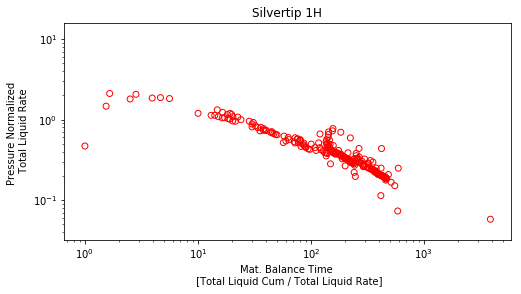

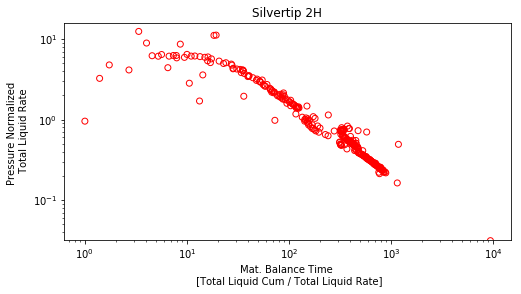

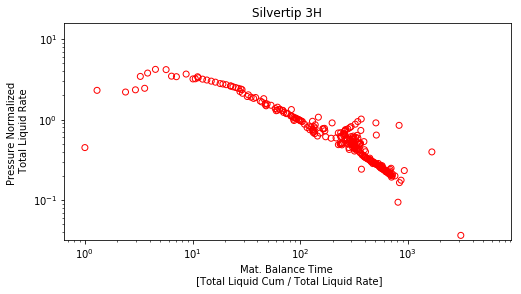

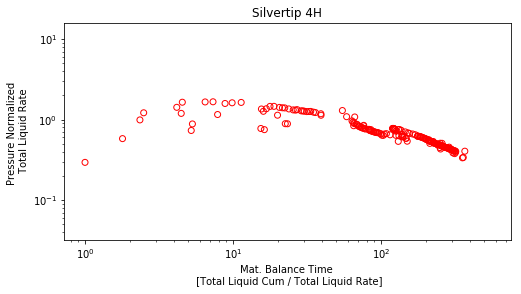

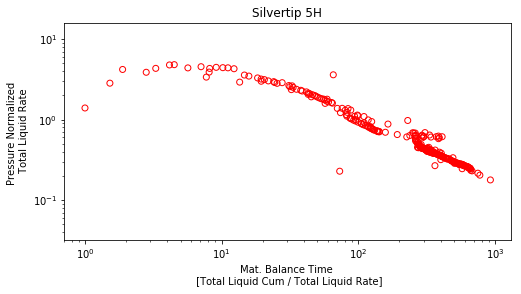

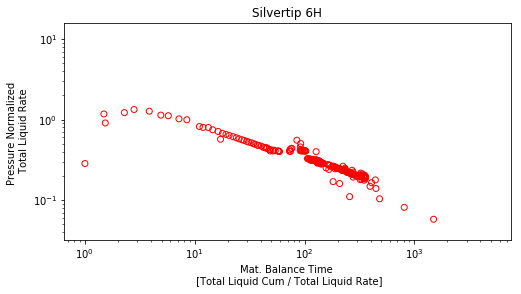

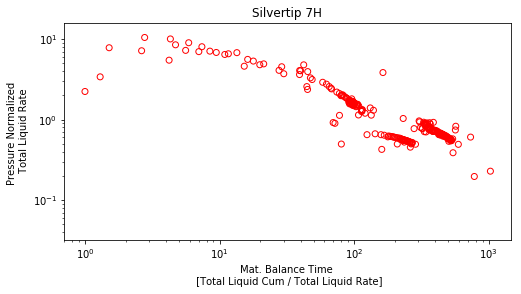

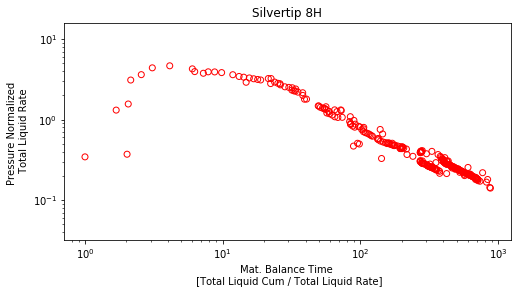

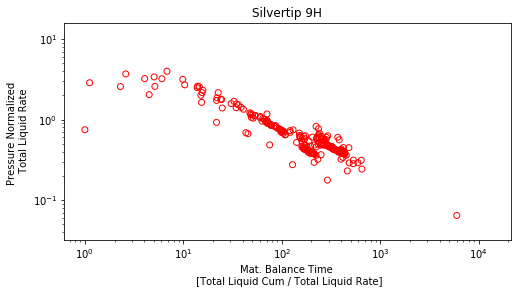

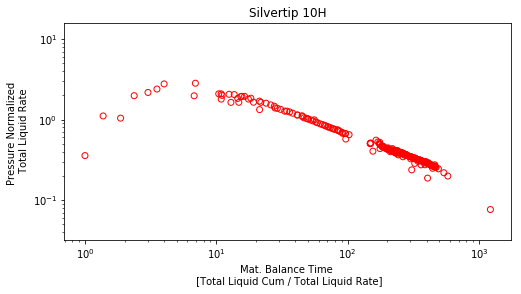

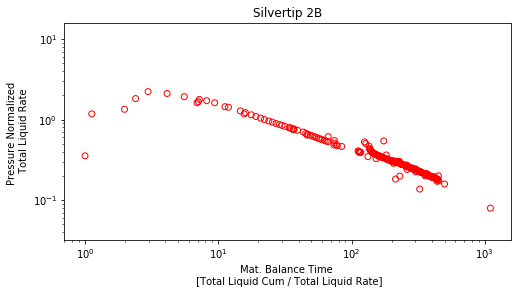

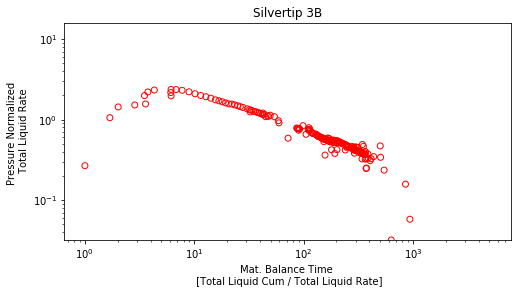

In [46]:
for i,well in enumerate(welldfs):
    
    fig, axs = plt.subplots(1, figsize=(8,4))
    axs.scatter(welldfs[well]['Mat Bal Time'],welldfs[well]['Rate N'],facecolors='none', edgecolors='r', label = 'Old Data')
    axs.set_ylim(bottom=10**-1.5)
    axs.set_ylim(top=10**1.2)
    axs.set_yscale('log')
    axs.set_xscale('log')
    axs.set_xlabel('Mat. Balance Time \n [Total Liquid Cum / Total Liquid Rate]', fontsize=10)
    axs.set_ylabel('Pressure Normalized \n Total Liquid Rate', fontsize=10)
    pad = 'Silvertip '
    wellname = pad + wellnames[i]
    axs.set_title(wellname)
    csvpath = "./SavedData/"+wellnames[i]+"RTA.csv"
    welldfs[well].to_csv(csvpath)

In [47]:
welldfs['9H'].to_csv("./SavedData/9H RTA.csv")

In [64]:
welldfs['1H'].iloc[30:38,1:4]

welldfs['1H']['Oil Rate'].ne(0).idxmax()
fir

28

In [65]:
#Change to first day of production
firstprod = []
firstproddfs = {}
for i,well in enumerate(welldfs):
    firstprod.append(welldfs[well]['Oil Rate'].ne(0).idxmax())
    plotdate = firstprod[i] - 1
    firstproddfs[well] = welldfs[well].iloc[plotdate:,:].copy()
    


In [158]:
firstproddfs['5H']['DaysOn'] = range(len(firstproddfs['5H']))

In [58]:
firstproddfs['5H'].head()

,Date,BHP,BHP at gauge,Casing Pressure,Choke,Gas Rate,Injection Rate,Oil Rate,Tubing Pressure,Water Rate,Cum Oil,Cum Water,Cum Liquid,Mat Bal Time,Delta P,Rate N
0,2018-10-09,0.00,NaN,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,9873.00,0.000000
1,2018-10-10,7699.71,NaN,3638.0,23.0,2544.11,0.0,666.0,0.0,2364.0,666.0,2364.0,3030.0,1.000000,2173.29,1.394200
2,2018-10-11,7855.62,NaN,3483.0,34.0,3390.06,0.0,1277.0,0.0,4440.0,1943.0,6804.0,8747.0,1.521535,2017.38,2.833874
3,2018-10-12,7794.77,NaN,3475.0,44.0,5716.86,0.0,2196.0,0.0,6520.0,4139.0,13324.0,17463.0,1.884791,2078.23,4.193954
4,2018-10-13,7466.51,NaN,3146.0,52.0,6172.10,0.0,2292.0,0.0,7020.0,6431.0,20344.0,26775.0,2.805846,2406.49,3.869536


In [67]:
#Number of perforation Clusters
NumOfPerfs = {
'1H':288,
'2H':320,
'3H':318,
'4H':316,
'5H':318,
'6H':318,
'7H':316,
'8H':318,
'9H':312,
'10H':318,
#'1B'282,
'2B':318,
'3B':234}


In [68]:
#Calculate Output Data for Fracture HalfLength
for i, well in enumerate(firstproddfs):
    
    #cluster efficiency
    Clusteff = 0.66
    Perforations = NumOfPerfs[well]*Clusteff
    
    #Calculate DaysOnline
    firstproddfs[well]['DaysOn'] = range(len(firstproddfs[well]))
    #Calculate square root time
    firstproddfs[well]['SqrtTime'] = firstproddfs[well]['DaysOn']**0.5
    
    #Calculate total liquid rate
    firstproddfs[well]['Total Liquid Rate'] = firstproddfs[well]['Water Rate'] + firstproddfs[well]['Oil Rate']
    #Calculate Per Cluster Rates
    firstproddfs[well]['Cluster Rate'] = firstproddfs[well]['Total Liquid Rate'] / Perforations
    
    #Calculate Delta P
    firstproddfs[well]['Delta P'] = ResPres [well] - firstproddfs[well]['BHP']
    #Calculate normalized pressure for TOTAL liquid (q / delta p)
    firstproddfs[well]['Rate P'] = (firstproddfs[well]['Delta P'] / firstproddfs[well]['Cluster Rate'])


In [69]:
 firstproddfs['5H'].head()

,Date,BHP,BHP at gauge,Casing Pressure,Choke,Gas Rate,Injection Rate,Oil Rate,Tubing Pressure,Water Rate,...,Cum Water,Cum Liquid,Mat Bal Time,Delta P,Rate N,DaysOn,SqrtTime,Total Liquid Rate,Cluster Rate,Rate P
0,2018-10-09,0.00,NaN,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,9873.00,0.000000,0,0.000000,0.0,0.000000,inf
1,2018-10-10,7699.71,NaN,3638.0,23.0,2544.11,0.0,666.0,0.0,2364.0,...,2364.0,3030.0,1.000000,2173.29,1.394200,1,1.000000,3030.0,14.436821,150.537989
2,2018-10-11,7855.62,NaN,3483.0,34.0,3390.06,0.0,1277.0,0.0,4440.0,...,6804.0,8747.0,1.521535,2017.38,2.833874,2,1.414214,5717.0,27.239375,74.061171
3,2018-10-12,7794.77,NaN,3475.0,44.0,5716.86,0.0,2196.0,0.0,6520.0,...,13324.0,17463.0,1.884791,2078.23,4.193954,3,1.732051,8716.0,41.528492,50.043473
4,2018-10-13,7466.51,NaN,3146.0,52.0,6172.10,0.0,2292.0,0.0,7020.0,...,20344.0,26775.0,2.805846,2406.49,3.869536,4,2.000000,9312.0,44.368210,54.239059


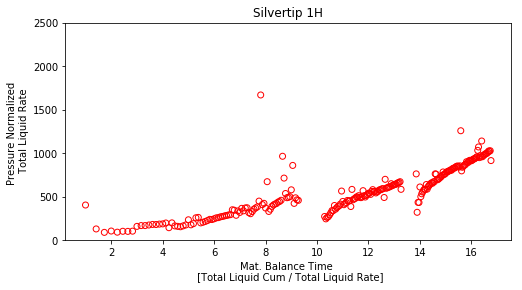

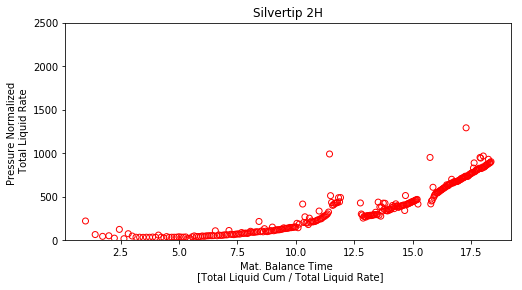

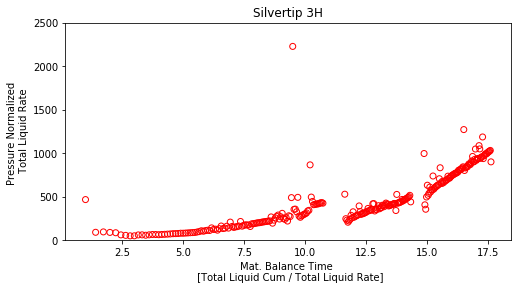

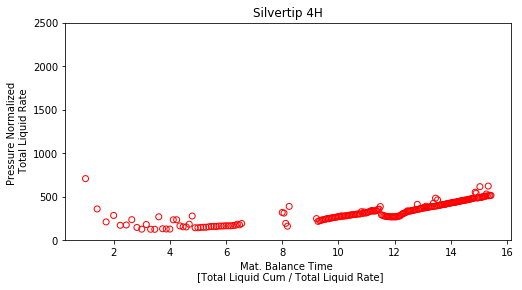

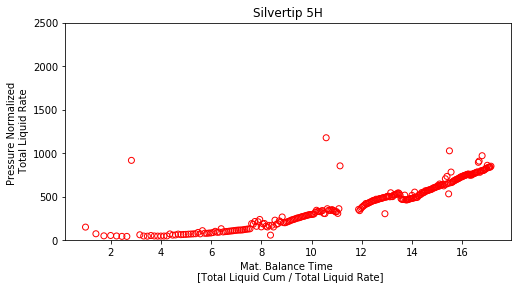

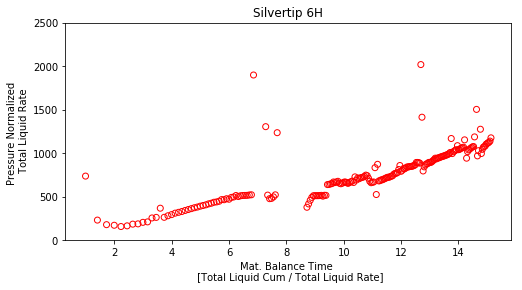

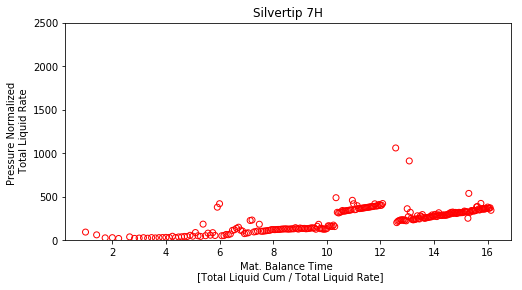

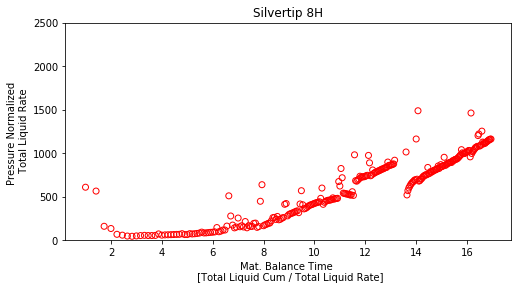

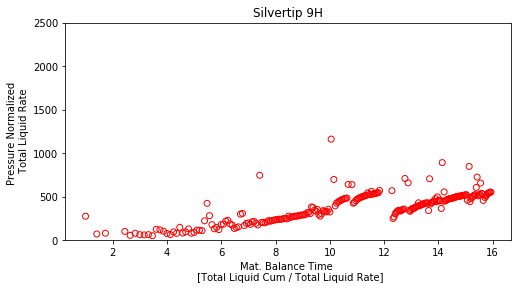

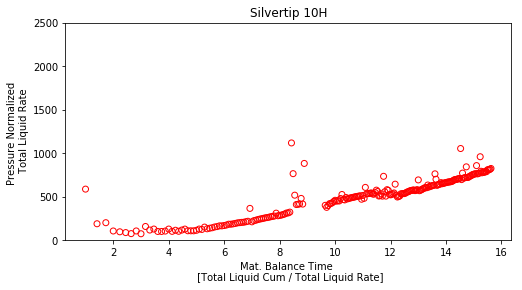

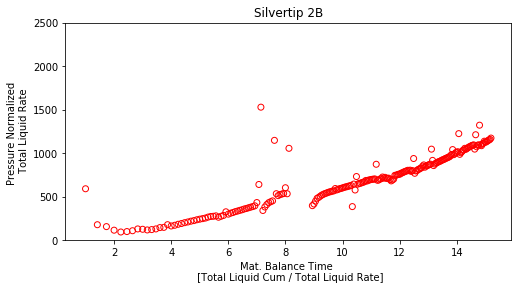

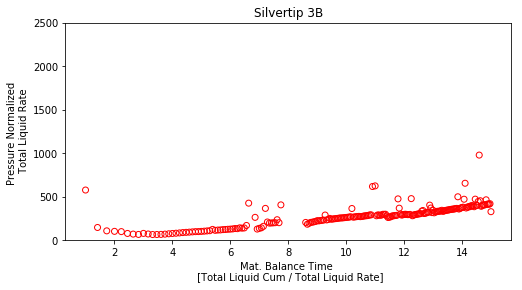

In [180]:
#Plot Output data for Fracture Halflength
for i,well in enumerate(welldfs):
    
    fig, axs = plt.subplots(1, figsize=(8,4))
    axs.scatter(firstproddfs[well]['SqrtTime'],firstproddfs[well]['Rate P'],facecolors='none', edgecolors='r', label = 'Old Data')
    axs.set_xlabel('Mat. Balance Time \n [Total Liquid Cum / Total Liquid Rate]', fontsize=10)
    axs.set_ylabel('Pressure Normalized \n Total Liquid Rate', fontsize=10)
    axs.set_ylim(top=2500)
    axs.set_ylim(bottom=0)
    pad = 'Silvertip '
    wellname = pad + wellnames[i]
    axs.set_title(wellname)
   # csvpath = "./SavedData/"+wellnames[i]+"RTA.csv"
    #welldfs[well].to_csv(csvpath)